#### Studying Analytics (Edx Course)
___

__Date Started:__  
__Nov 23, 2018__  

__Introduction:__  
__The course is intended as an introductory tool for data Analysis using R Programming language__  
__Unit : 2__  (Assignment no 4)


__Content__:  
* In this problem, we will be examining the "state" dataset, which has data from the 1970s on all fifty US states. For each state, the dataset includes :
 * the population, 
 * per capita income, 
 * illiteracy rate, 
 * murder rate, 
 * high schoolgraduation rate, 
 * average number of frost days, 
 * area, 
 * latitude and longitude, 
 * division the state belongs to,  
 * region the state belongs to, and 
 * two-letter abbreviation


__links:__  
* NA


In [5]:
# check if the data set is already available in R

data(state)
statedata = cbind(data.frame(state.x77), state.abb, state.area, state.center,  state.division, state.name, state.region)

# summary(statedata)
statedata[1:10, ]
# so the data set is already available in the default R package

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
California,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766,CO,104247,-105.5130,38.6777,Mountain,Colorado,West
Connecticut,3100,5348,1.1,72.48,3.1,56.0,139,4862,CT,5009,-72.3573,41.5928,New England,Connecticut,Northeast
Delaware,579,4809,0.9,70.06,6.2,54.6,103,1982,DE,2057,-74.9841,38.6777,South Atlantic,Delaware,South
Florida,8277,4815,1.3,70.66,10.7,52.6,11,54090,FL,58560,-81.6850,27.8744,South Atlantic,Florida,South
Georgia,4931,4091,2.0,68.54,13.9,40.6,60,58073,GA,58876,-83.3736,32.3329,South Atlantic,Georgia,South


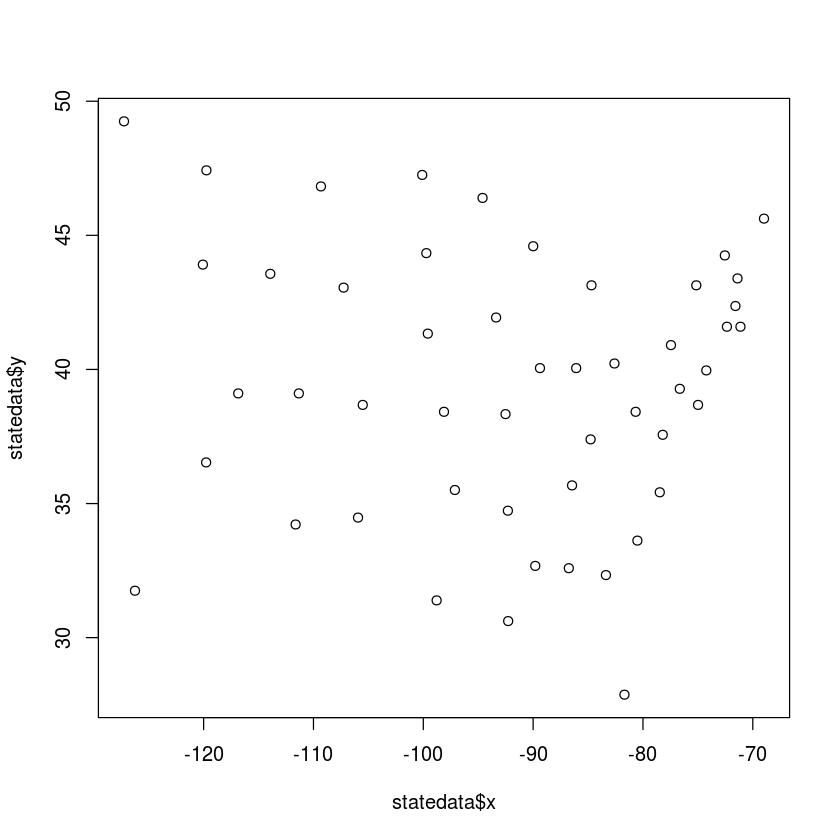

In [13]:
# plot the coordinate of the latitude and logitude to obtain the map of the United States of America

plot(statedata$x, statedata$y)


In [19]:
# Solution to problem 1.1
# use tapply to find which region has the highest highschool graduation rate

highschool_data = tapply(statedata$HS.Grad, statedata$state.region, sum);
sort(highschool_data, decreasing = TRUE)


# West Region has the highest highschool graduation rate than any other states.


ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_g

West         South North Central     Northeast 
        806.0         709.5         654.2         485.7

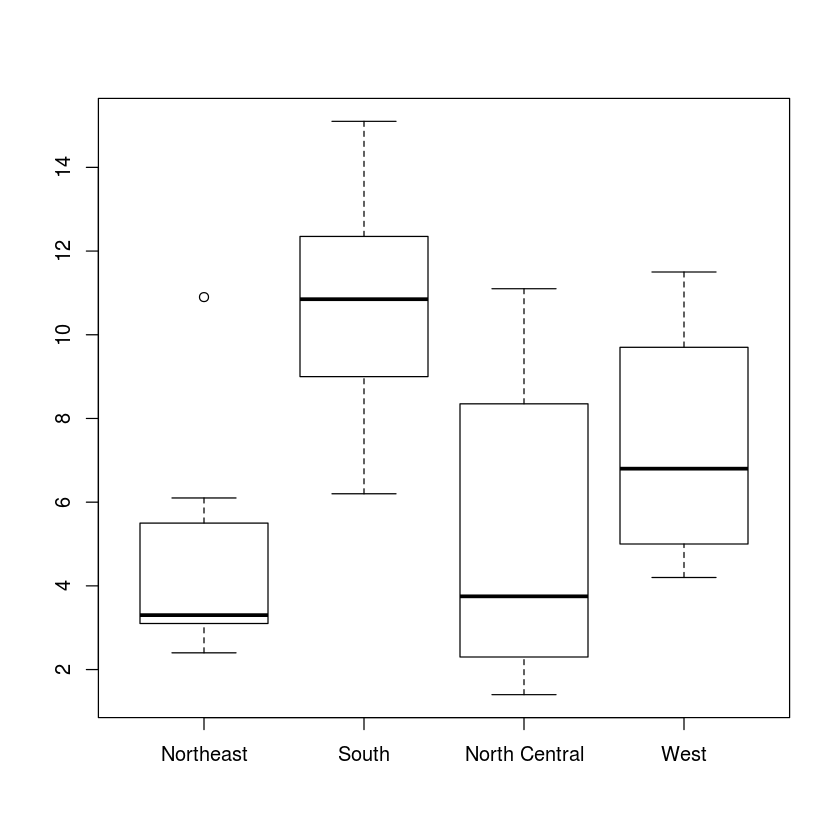

In [36]:
# solution to problem 1.3
summary_box_plot = boxplot(Murder ~ state.region, data=statedata)
# looking at the following box plot, it appears that the "Souhern" region has the highest median murder rate

In [46]:
# solution to problem 1.4
# To find out the outlier data in the murderrate 

regional_murder_rate = tapply(statedata$Murder, statedata$state.region, identity)
northeast_murder_rate = subset(statedata, statedata$state.region == 'Northeast')
northeast_murder_rate[which.max(northeast_muder_rate$Murder), ]$state.name

# the statename which is an outlier as well as the highest murder rate in Northeast state is "NewYork"

[1] New York
50 Levels: Alabama Alaska Arizona Arkansas California Colorado ... Wyoming

# solution to problem 1.5

# predicting the life expectancy using all available data


life_expectancy_reg_model = lm(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area , data=statedata)
summary(life_expectancy_reg_model)

# The coefficient of income is -2.18e-5

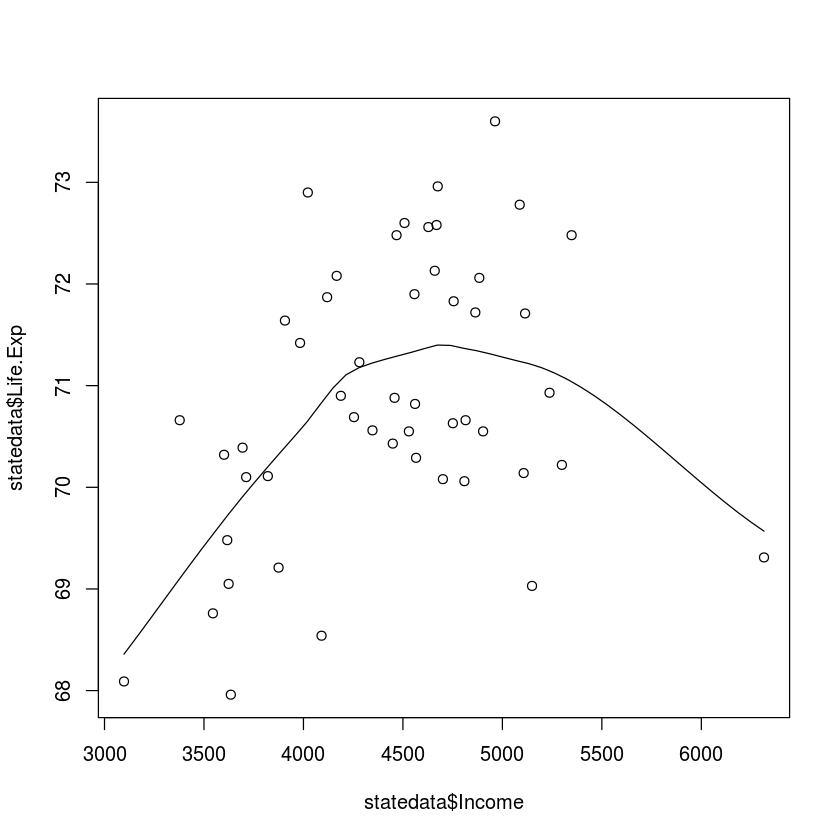

[1] 0.3402553

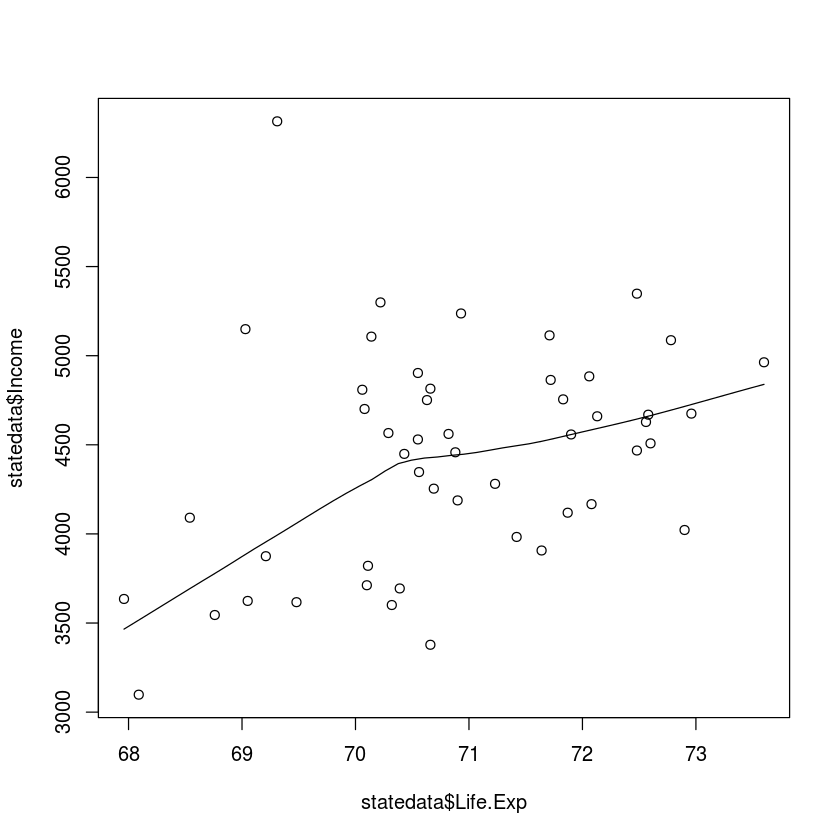

In [56]:
# plotting graph of life expectancy and income

scatter.smooth(statedata$Income, statedata$Life.Exp )
scatter.smooth(statedata$Life.Exp, statedata$Income)
cor(statedata$Life.Exp, statedata$Income)

In [61]:
life_expectancy_reg_model = lm(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area , data=statedata)

life_expectancy_reg_model_1 = lm(Life.Exp ~ Income + Murder + HS.Grad + Frost, data=statedata)
life_expectancy_reg_model_2 = lm(Life.Exp ~ Population + Income + HS.Grad + Frost, data=statedata)
life_expectancy_reg_model_3 = lm(Life.Exp ~ Murder + HS.Grad + Frost + Illiteracy, data=statedata)
life_expectancy_reg_model_4 = lm(Life.Exp ~ Population + Murder + HS.Grad + Frost , data=statedata)

summary(life_expectancy_reg_model)
summary(life_expectancy_reg_model_1)
summary(life_expectancy_reg_model_2)
summary(life_expectancy_reg_model_3)
summary(life_expectancy_reg_model_4)

# since the r2 value of the 4th model is the highest, we choose it as the most significant model
# and reject remaining model


Call:
lm(formula = Life.Exp ~ Population + Income + Illiteracy + Murder + 
    HS.Grad + Frost + Area, data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48895 -0.51232 -0.02747  0.57002  1.49447 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.094e+01  1.748e+00  40.586  < 2e-16 ***
Population   5.180e-05  2.919e-05   1.775   0.0832 .  
Income      -2.180e-05  2.444e-04  -0.089   0.9293    
Illiteracy   3.382e-02  3.663e-01   0.092   0.9269    
Murder      -3.011e-01  4.662e-02  -6.459 8.68e-08 ***
HS.Grad      4.893e-02  2.332e-02   2.098   0.0420 *  
Frost       -5.735e-03  3.143e-03  -1.825   0.0752 .  
Area        -7.383e-08  1.668e-06  -0.044   0.9649    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7448 on 42 degrees of freedom
Multiple R-squared:  0.7362,	Adjusted R-squared:  0.6922 
F-statistic: 16.74 on 7 and 42 DF,  p-value: 2.534e-10



Call:
lm(formula = Life.Exp ~ Income + Murder + HS.Grad + Frost, data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.40443 -0.53191  0.07086  0.59086  1.20543 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 70.8367894  1.0504710  67.433  < 2e-16 ***
Income       0.0001274  0.0002232   0.571  0.57103    
Murder      -0.2855582  0.0372605  -7.664 1.07e-09 ***
HS.Grad      0.0435538  0.0189754   2.295  0.02643 *  
Frost       -0.0069835  0.0024688  -2.829  0.00696 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7482 on 45 degrees of freedom
Multiple R-squared:  0.7147,	Adjusted R-squared:  0.6894 
F-statistic: 28.19 on 4 and 45 DF,  p-value: 9.46e-12



Call:
lm(formula = Life.Exp ~ Population + Income + HS.Grad + Frost, 
    data = statedata)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0771 -0.6406 -0.0087  0.6746  2.1241 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.591e+01  1.261e+00  52.251  < 2e-16 ***
Population   5.803e-06  4.137e-05   0.140 0.889067    
Income      -9.158e-05  3.612e-04  -0.254 0.801015    
HS.Grad      9.758e-02  2.738e-02   3.564 0.000878 ***
Frost        1.617e-03  3.568e-03   0.453 0.652561    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.136 on 45 degrees of freedom
Multiple R-squared:  0.3427,	Adjusted R-squared:  0.2842 
F-statistic: 5.865 on 4 and 45 DF,  p-value: 0.000692



Call:
lm(formula = Life.Exp ~ Murder + HS.Grad + Frost + Illiteracy, 
    data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48906 -0.51040  0.09793  0.55193  1.33480 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 71.519958   1.320487  54.162  < 2e-16 ***
Murder      -0.273118   0.041138  -6.639  3.5e-08 ***
HS.Grad      0.044970   0.017759   2.532  0.01490 *  
Frost       -0.007678   0.002828  -2.715  0.00936 ** 
Illiteracy  -0.181608   0.327846  -0.554  0.58236    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7483 on 45 degrees of freedom
Multiple R-squared:  0.7146,	Adjusted R-squared:  0.6892 
F-statistic: 28.17 on 4 and 45 DF,  p-value: 9.547e-12



Call:
lm(formula = Life.Exp ~ Population + Murder + HS.Grad + Frost, 
    data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47095 -0.53464 -0.03701  0.57621  1.50683 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.103e+01  9.529e-01  74.542  < 2e-16 ***
Population   5.014e-05  2.512e-05   1.996  0.05201 .  
Murder      -3.001e-01  3.661e-02  -8.199 1.77e-10 ***
HS.Grad      4.658e-02  1.483e-02   3.142  0.00297 ** 
Frost       -5.943e-03  2.421e-03  -2.455  0.01802 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7197 on 45 degrees of freedom
Multiple R-squared:  0.736,	Adjusted R-squared:  0.7126 
F-statistic: 31.37 on 4 and 45 DF,  p-value: 1.696e-12


In [72]:
# solution to problem 3.3
prediction_model_4 = predict(life_expectancy_reg_model_4)

predicted_low_life_exp_state = statedata[which.min(prediction_model_4), ]
actual_low_life_exp_state =  statedata[which.min(statedata$Life.Exp),]

predicted_low_life_exp_state
actual_low_life_exp_state
# cbind(prediction_model_4, statedata$Life.Exp)


,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South


,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
South Carolina,2816,3635,2.3,67.96,11.6,37.8,65,30225,SC,31055,-80.5056,33.619,South Atlantic,South Carolina,South


In [73]:
# solution to problem 3.4
predicted_high_life_exp_state = statedata[which.max(prediction_model_4), ]
actual_high_life_exp_state =  statedata[which.max(statedata$Life.Exp),]

predicted_high_life_exp_state
actual_high_life_exp_state

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
Washington,3559,4864,0.6,71.72,4.3,63.5,32,66570,WA,68192,-119.746,47.4231,Pacific,Washington,West


,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
Hawaii,868,4963,1.9,73.6,6.2,61.9,0,6425,HI,6450,-126.25,31.75,Pacific,Hawaii,West


In [77]:
# solution to problem 3.5
# which state's life expectancy have the minimum error (determine those from the residuals property of the reg model)
statedata[which.min(life_expectancy_reg_model_4$residuals), ]
statedata[which.max(life_expectancy_reg_model_4$residuals), ]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
Maine,1058,3694,0.7,70.39,2.7,54.7,161,30920,ME,33215,-68.9801,45.6226,New England,Maine,Northeast


,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
Hawaii,868,4963,1.9,73.6,6.2,61.9,0,6425,HI,6450,-126.25,31.75,Pacific,Hawaii,West
